<a href="https://colab.research.google.com/github/haishesauke/ignitus/blob/main/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

In this project, we aim to conduct a comprehensive analysis of the Obesity Levels dataset sourced from the UCI repositories. Our primary objectives are to explore the dataset's structure and content, assess data consistency and format compliance, and identify and rectify any quality issues that may exist. Specifically, we will be on the lookout for inaccuracies such as incorrectly formatted addresses, which have the potential to impact the accuracy of our analytical results. By ensuring that our dataset is of high quality and adheres to the necessary standards, we aim to derive reliable and actionable insights from it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (10,6) # will adjust the configuration of the plots we will create

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#checking for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# renaming columns for better understanding of dataset
df.rename(columns={'FCVC': 'Frequency of Vegetable Consumption'}, inplace=True)
df.rename(columns={'NCP': 'Number of Main Meals'}, inplace=True)
df.rename(columns={'CH2O': 'Water Consumption'}, inplace=True)
df.rename(columns={'FAF': 'Physical Activity Frequency'}, inplace=True)
df.rename(columns={'TUE': 'Time Spent on Sedentary Activities'}, inplace= True)
df.rename(columns={'CAEC': 'consumption of food between meals'}, inplace= True)
df.rename(columns={'SCC': 'individual monitors calories'}, inplace= True)
df.rename(columns={'CALC': 'use of a calculator by indvidual'}, inplace= True)
df.rename(columns={'MTRANS': 'mode of transportation used by individual'}, inplace= True)
df.rename(columns={'NObeyesdad': 'level of obesity'}, inplace= True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,SMOKE,Water Consumption,individual monitors calories,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# converting certain values to numerical data for better statistical analysis
df = pd.get_dummies(df, columns = ['Gender'])
df = pd.get_dummies(df, columns = ['FAVC'])
df = pd.get_dummies(df, columns = ['SMOKE'])
df = pd.get_dummies(df, columns = ['family_history_with_overweight'])
df = pd.get_dummies(df, columns = ['individual monitors calories'])
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,Gender_Female,Gender_Male,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,individual monitors calories_no,individual monitors calories_yes
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,1,0,1,0,1,0,0,1,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,1,0,1,0,0,1,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,0,1,1,0,1,0,0,1,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,0,1,1,0,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,0,1,1,0,1,0,1,0,1,0


In [7]:
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,Gender_Female,Gender_Male,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,individual monitors calories_no,individual monitors calories_yes
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,1,0,1,0,1,0,0,1,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,1,0,1,0,0,1,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,0,1,1,0,1,0,0,1,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,0,1,1,0,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,0,1,1,0,1,0,1,0,1,0


In [8]:
df.drop('Gender_Female', axis = 1 , inplace = True)
df.rename(columns = {'Gender_Male' : 'Gender'} , inplace = True )

df.drop('FAVC_no', axis = 1 , inplace = True)
df.rename(columns = {'FAVC_yes' : 'FAVC'} , inplace = True )

df.drop('family_history_with_overweight_no', axis = 1 , inplace = True)
df.rename(columns = {'family_history_with_overweight_yes' : 'family_history_with_overweight'} , inplace = True )

df.drop('SMOKE_no', axis = 1 , inplace = True)
df.rename(columns = {'SMOKE_yes' : 'SMOKE'} , inplace = True )

df.drop('individual monitors calories_no', axis = 1 , inplace = True)
df.rename(columns = {'individual monitors calories_yes' : 'individual monitors calories'} , inplace = True )

In [9]:
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity,Gender,FAVC,SMOKE,family_history_with_overweight,individual monitors calories
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,0,1,1,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0,0




---
#statistical summary


In [10]:
df.describe()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,Gender,FAVC,SMOKE,family_history_with_overweight,individual monitors calories
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.505921,0.883941,0.020843,0.817622,0.045476
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.500083,0.320371,0.142893,0.386247,0.208395
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,1.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


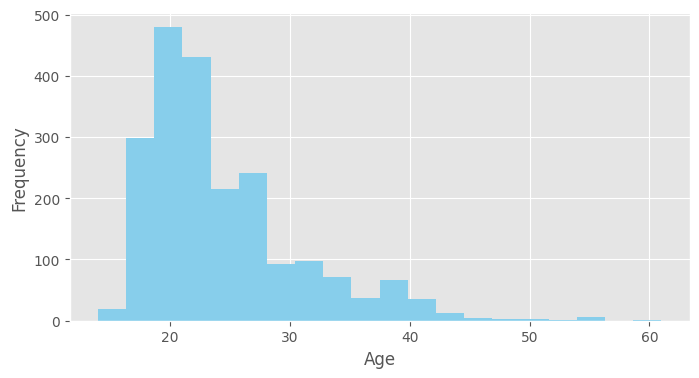

the mean Age is : 24.312599908574136


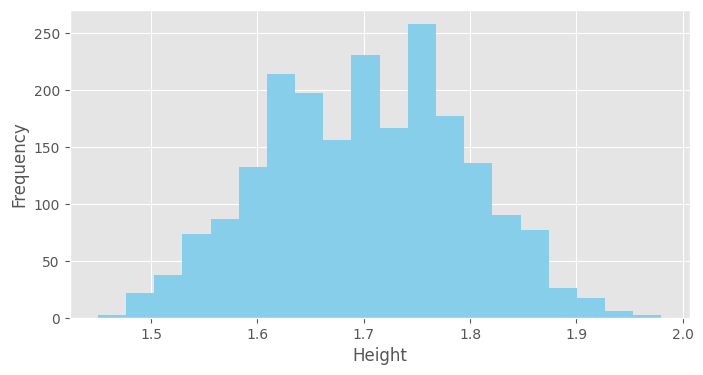

the mean Height is : 1.7016773533870204


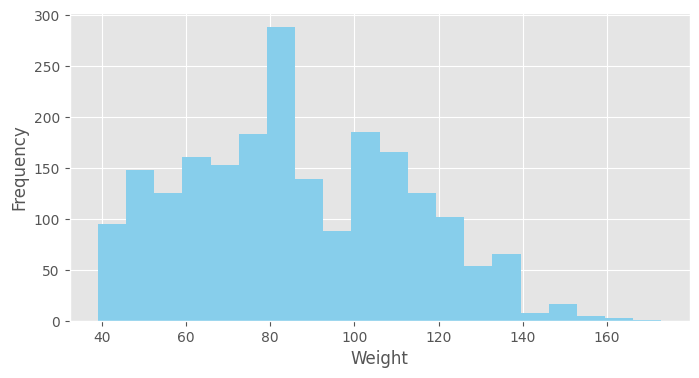

the mean Weight is : 86.58605812648035


In [11]:
# analysis of Numerical Variables
var = ['Age', 'Height', 'Weight']
for v in var:
  plt.figure(figsize = (8,4))
  plt.hist(df[v], bins =20, color = "skyblue")
  plt.xlabel(v)
  plt.ylabel('Frequency')
  plt.show()
  print("the mean "+v+" is :", df[v].mean())

we can see a little isolated bar between 50 and 60 in the age histgraph which indicates that it can be a potential outlier. Hence we would like to remove it to make our model more efficient.

In [12]:
df = df[(df['Age'] < 50) | (df['Age'] > 60)]

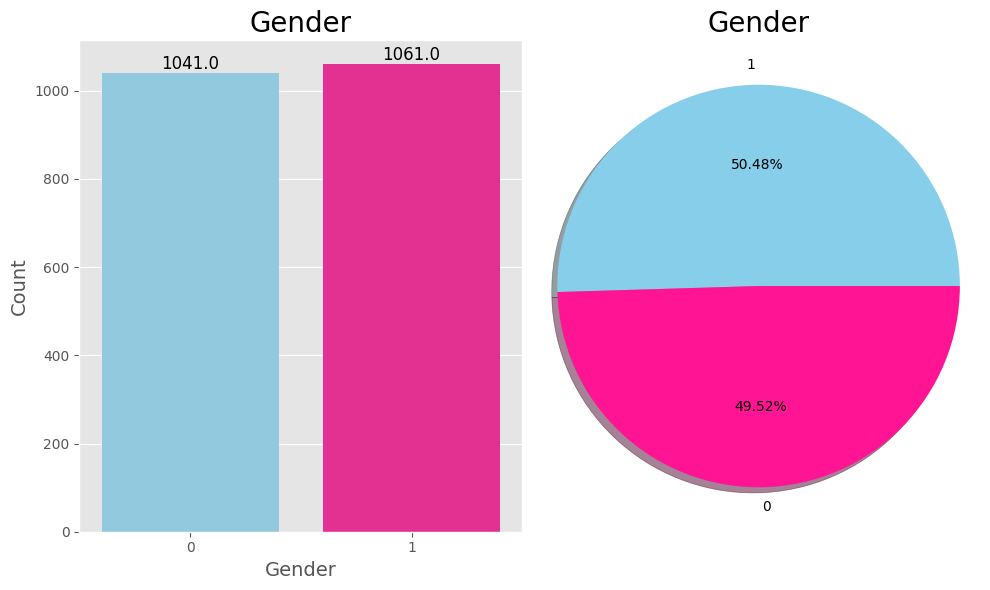

In [13]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df, palette=['skyblue', 'deeppink'], ax=ax1)
ax1.set_title("Gender", fontsize=20)
ax1.set_xlabel('Gender', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Add labels to the countplot bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Plot the pie chart with custom styling
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', shadow=True, colors=['skyblue', 'deeppink'])
ax2.set_title("Gender", fontsize=20)
ax2.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-14-c46458e558fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


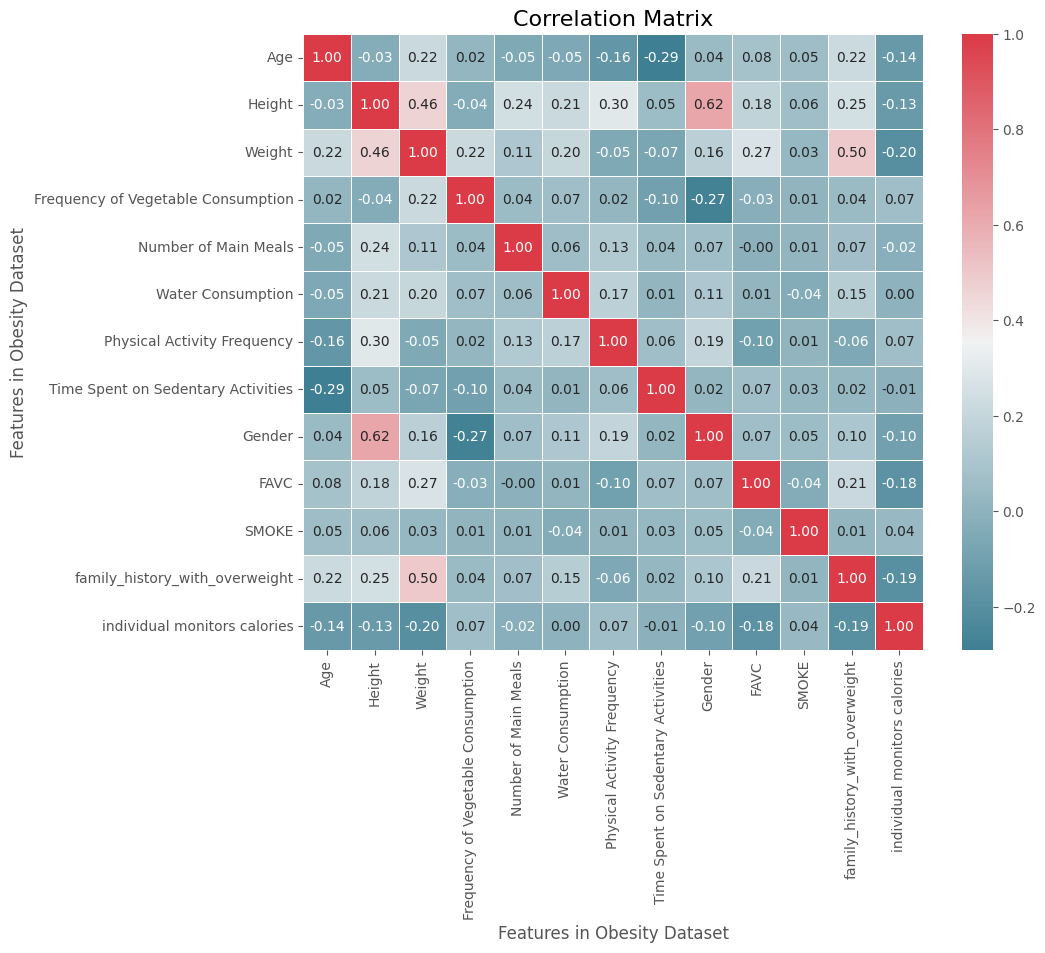

In [14]:
correlation_matrix = df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
corr_map = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(correlation_matrix, annot = True, fmt =".2f", cmap = corr_map, linewidths = 0.5, cbar = True)
plt.title("Correlation Matrix", fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks()

# Customize the axis labels
plt.xlabel("Features in Obesity Dataset", fontsize=12)
plt.ylabel("Features in Obesity Dataset", fontsize=12)

# Show the plot
plt.show()

from the correlation matrics we found that height and weigth of the individual have the most impact on the level of obesity


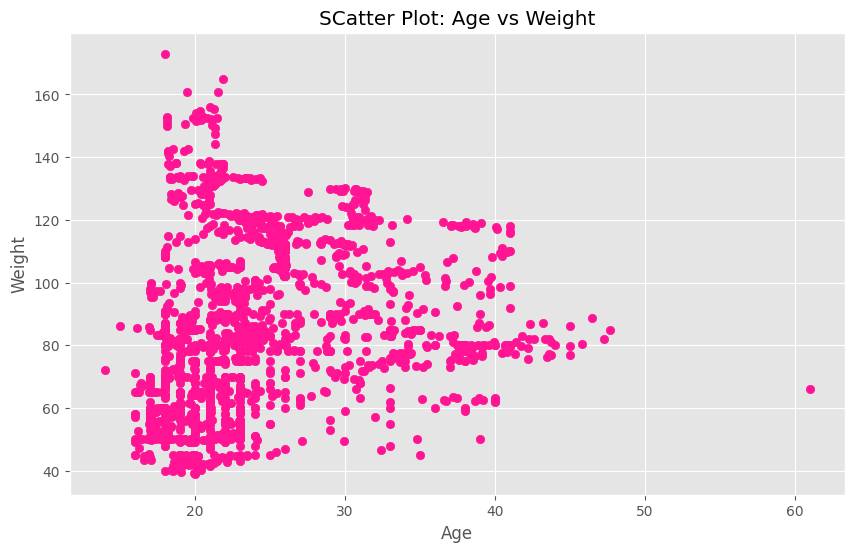

Correlation between Age and Weight: 0.22


In [15]:
plt.scatter(df['Age'], df['Weight'], color = 'deeppink')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title("SCatter Plot: Age vs Weight")
plt.show()

correlation = df['Age'].corr(df['Weight'])    # Gives the correlation between age and weight
print(f'Correlation between Age and Weight: {correlation:.2f}')

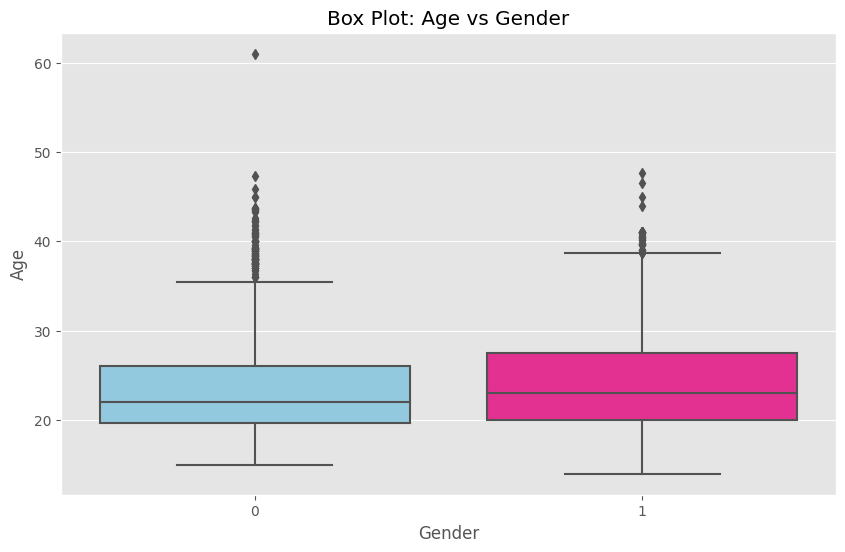

level of obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                                 
0                                 173            140             155   
1                                  99            146             195   

level of obesity  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                    
0                               2               323                 145   
1                             295                 1                 144   

level of obesity  Overweight_Level_II  
Gender                                 
0                                 103  
1                                 181  


In [16]:
sns.boxplot(x = 'Gender', y ='Age', data = df, palette=['skyblue', 'deeppink'])
plt.title("Box Plot: Age vs Gender")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

contingency_table = pd.crosstab(df['Gender'], df['level of obesity'])
print(contingency_table)

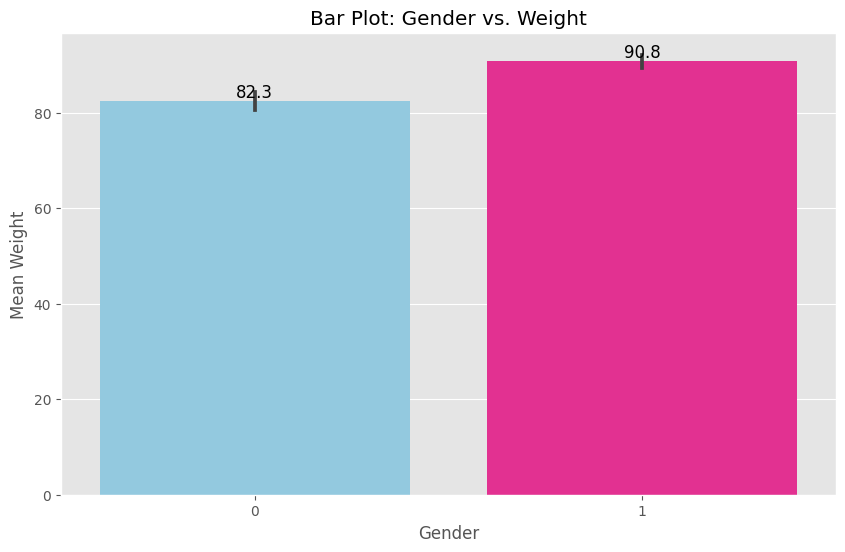

In [17]:
sns.barplot(x='Gender', y='Weight', data=df,  palette=['skyblue', 'deeppink'])
plt.xlabel('Gender')
plt.ylabel('Mean Weight')
plt.title('Bar Plot: Gender vs. Weight')
ax = plt.gca()
# adds labels on top
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.show()



---


#let's check our hypothesis by t-test

In [ ]:
import pandas as pd
from scipy import stats

# Initialize an empty DataFrame with the specified columns
ttest_results = pd.DataFrame(columns=['Category1', 'Category2', 'Variable', 'P-value'])

# Get unique categories from the 'level of obesity' variable
categories = df['level of obesity'].unique()

# Perform t-tests for 'Height' and 'Weight' between different categories
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        category1 = categories[i]
        category2 = categories[j]

        data_of_category1_height = df[df['level of obesity'] == category1]['Height']
        data_of_category2_height = df[df['level of obesity'] == category2]['Height']
        height_tstat, height_pvalue = stats.ttest_ind(data_of_category1_height, data_of_category2_height)

        data_of_category1_weight = df[df['level of obesity'] == category1]['Weight']
        data_of_category2_weight = df[df['level of obesity'] == category2]['Weight']
        weight_tstat, weight_pvalue = stats.ttest_ind(data_of_category1_weight, data_of_category2_weight)

        # Append the results to the DataFrame
        ttest_results = ttest_results.append({
            'Category1': category1,
            'Category2': category2,
            'Variable': 'Height',
            'P-value': height_pvalue
        }, ignore_index=True)

        ttest_results = ttest_results.append({
            'Category1': category1,
            'Category2': category2,
            'Variable': 'Weight',
            'P-value': weight_pvalue
        }, ignore_index=True)

# Print the DataFrame with t-test results
print(ttest_results)


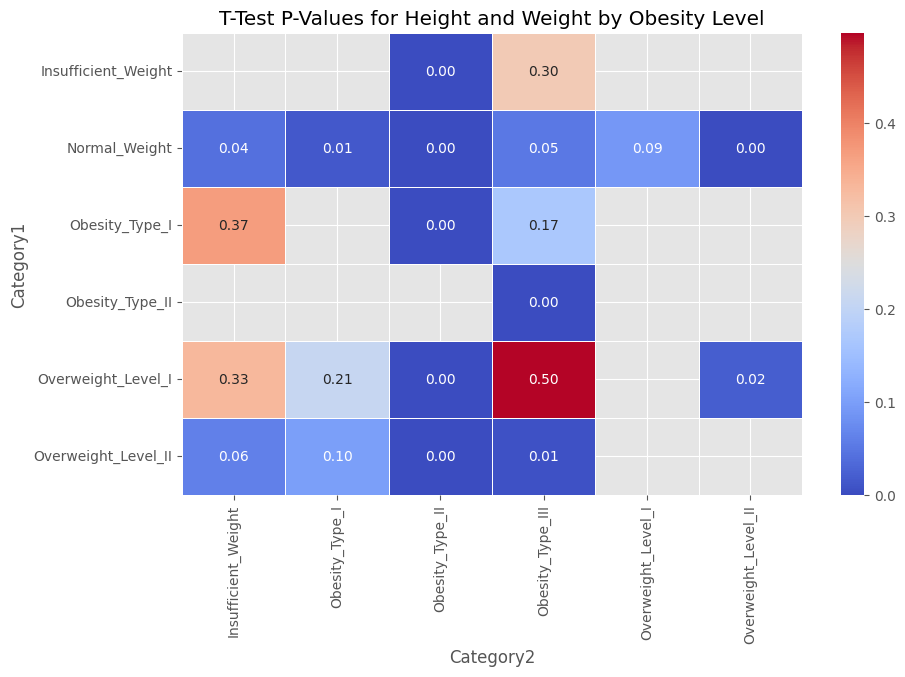

In [20]:
pivot_table = ttest_results.pivot_table(index='Category1', columns='Category2', values='P-value')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('T-Test P-Values for Height and Weight by Obesity Level')
plt.show()






based on the t-test results, it appears that weight is a more influential factor than height in differentiating between various levels of obesity. Weight tends to vary significantly across different obesity levels, while the variation in height is less consistent.





---
#Feature Engineering
we create a new dataset which is a copy of original dataset with new columns like:-
BMI , Age-groups, Physical_activity_index, nutritional index

In [21]:
new_df = df.copy()

# BMI calculation
new_df['BMI'] = new_df['Weight'] / (new_df['Height']**2)

# creating age groups
agebin = [0,18,25,35, 45, float('inf')]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46+']
new_df['Age-group'] = pd.cut(new_df['Age'], bins= agebin, labels= age_labels)

# interaction features
new_df['Physical_activity_index'] = new_df['Physical Activity Frequency'] * new_df['Time Spent on Sedentary Activities']

# creating nutritional index
new_df['Nuetritional Index'] = (new_df['Frequency of Vegetable Consumption'] + new_df['Number of Main Meals'] + new_df['Water Consumption']) / 3

# converting values in the gender column to binary
new_df = pd.get_dummies(new_df, columns=['Gender'], drop_first=True)

new_df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,level of obesity,FAVC,SMOKE,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,Normal_Weight,0,0,1,0,24.386526,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,Normal_Weight,0,1,1,1,24.238227,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,Normal_Weight,0,0,1,0,23.765432,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,Overweight_Level_I,0,0,0,0,26.851852,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,Overweight_Level_II,0,0,0,0,28.342381,19-25,0.0,1.666667,1


In [22]:
# removing FAVC	Frequency of Vegetable Consumption	Number of Main Meals
columns_to_remove = ['FAVC', 'Frequency of Vegetable Consumption', 'Number of Main Meals']
new_df = new_df.drop(columns=columns_to_remove)
new_df.head()

,Age,Height,Weight,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity,SMOKE,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,Sometimes,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0,1,0,24.386526,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,Sometimes,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1,1,24.238227,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,Sometimes,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1,0,23.765432,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,Sometimes,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,0,0,26.851852,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,Sometimes,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,0,0,28.342381,19-25,0.0,1.666667,1


In [23]:
# removing more columns that we dont need
values = ['consumption of food between meals', 'SMOKE', 'Water Consumption',
          'Physical Activity Frequency', 'Time Spent on Sedentary Activities',
          'use of a calculator by indvidual', 'mode of transportation used by individual']
new_df = new_df.drop(columns=values)
new_df.head()

,Age,Height,Weight,level of obesity,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,Normal_Weight,1,0,24.386526,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,Normal_Weight,1,1,24.238227,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,Normal_Weight,1,0,23.765432,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,Overweight_Level_I,0,0,26.851852,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,Overweight_Level_II,0,0,28.342381,19-25,0.0,1.666667,1


**Findings**

1. **Age Distribution**: The mean age of the individuals in the dataset is approximately 24 years.

2. **Height**: The mean height of the individuals is approximately 1.70 meters.

3. **Weight**: The mean weight of the individuals is approximately 86.62 kilograms.

4. **Gender Distribution**: The dataset contains an almost equal number of males and females, indicating a relatively balanced representation of gender.

5. **Correlation Between Age and Weight**: There is a positive but weak correlation (correlation coefficient = 0.22) between age and weight. This suggests that, on average, as age increases, weight tends to increase slightly.


#Summary:
In this dataset, the mean age is approximately 24 years, with an average height of 1.70 meters and weight of 86.62 kilograms. Gender distribution is nearly equal, indicating a balanced representation. There is a weak positive correlation (0.22) between age and weight, suggesting a slight increase in weight with age. Notably, different levels of obesity exhibit gender-specific disparities; Obesity Type III is more prevalent among females, while Obesity Type II is primarily observed in males. These findings offer a snapshot of the dataset, highlighting age, gender, and weight-related trends, along with variations in obesity levels between genders.

